 <h1>Building an Artificial Neural Network (ANN) for Selecting the Optimal NBA Team</h1>
 <h2>Nathan Dilla & John Haviland</h2>

 
<h3>Problem Statement</h3>
    The problem is to identify the optimal team of 5 players from a pool of 603 NBA players from the 2021-22 NBA season. The criteria chosen to build this optimal team will be based on statistics given in the dataset, picking specific player characteristics based on those stats to try and build a balanced team.



<h3>Data Preparation</h3>

When the dataset of NBA players is loaded in, we selected the input features for our ANN. The selected features include:

    - player height (player_height)
    - games played (gp)
    - points per game (pts)
    - rebounds per game (reb)
    - assists per game (ast)
    - offensive rebounding percentage (oreb_pct)
    - defensive rebounding percentage (dreb_pct)
    - usage percentage (usg_pct)
    - true shooting percentage (ts_pct)
    - assist percentage (ast_pct)



With the specific criteria being:

    For all positions:
        
        - At least 60 games played
            - Games played can generally help quantify how healthy a player is throughout the season.
            - The optimal team should have players who are available to play as much as possible
        - A positive net rating (> 0)
            - Net rating determines how much of a positive/negative impact a player has while playing, so it is important for the optimal team to have players who all have a positive impact.
        - A usage rate of less than 35%
            - Usage rate helps determine how ball-dominant an offensive player is
            - The optimal team has players who are not detrimentally ball-dominant
        - A true shooting percentage greater than 57%
            - True shooting percentage takes into account all shots taken by a player and balances it with the expression: TS% = Points / ((2 x FGAs) + (0.88 x FTAs))
            - League Average TS% in 2021-2022: 57.2%
            - Players with above league-average TS%'s are considered efficient scorers, which all players on an optimal team should be.
        
    For point guards:

        - Height above 180cm
            - Want to avoid size mismatches on an optimal team
        - Average more than 6 assists per game
        - Assist percentage higher than 15%
            - Want to have a point guard who can assist other players on the team frequently

    For shooting guards:
        - Height above 195cm
            - Want to avoid size mismatches on an optimal team
        - Average more than 18 points per game
            - A shooting guard on an optimal team should be able to score at a high level
        - Assist percentage higher than 10%
            - Want to ensure that the shooting guard is not too selfish
    
    For small forwards:
        - Height above 203cm
            - Want to avoid size mismatches on an optimal team
        - Average more than 18 points per game
            - A small forward on an optimal team should be able to score at a high level
        - Average more than 4 rebounds per game
        - Defensive rebounding percentage greater than 12%
            - A small forward on an optimal team should be able to grab rebounds
        - Assist percentage higher than 10%
            - Want to ensure that the small forward is not too selfish

    For power forwards:
        - Height above 205cm
            - Want to avoid size mismatches on an optimal team
        - Average more than 18 points per game
            - A power forward on an optimal team should be able to score at a high level
        - Average more than 6 rebounds per game
        - Defensive rebounding percentage higher than 16%
            - A power forward on an optimal team should be able to grab rebounds at a higher rate
        - Assist percentage higher than 10%
            - Want to ensure that the power forward is not too selfish

    For centers:
        - Height above 208cm
            - Want to avoid size mismatches on an optimal team
        - Average more than 6 rebounds per game
        - Defensive rebounding percentage higher than 22%
            - A power forward on an optimal team should be able to grab rebounds at a high rate
        - Assist percentage higher than 5%
            - Want to ensure that the power forward is not too selfish








<h3>Algorithm of the Solution</h3>

The algorithm for selecting the optimal NBA team using an Artificial Neural Network (ANN) closely follows the provided code. Here are the steps:

1. **Data Loading and Preparation:**
   - Load the NBA player dataset from the 'nba-players_21-22.json' file.
   - Select a pool of players for analysis.

2. **Feature Selection and Criteria Definition:**
   - Define the selection criteria for each position based on player statistics and characteristics. These criteria are used to assign positions to players within the pool.

3. **Data Transformation and Labeling:**
   - Extract the input features (player statistics) and label each player with their respective positions based on the defined criteria.
   - Transform the data into a format suitable for training the ANN.

4. **Data Splitting:**
   - Split the transformed data into training and testing sets.

5. **Model Architecture:**
   - Build the ANN model with the following architecture:
     - Input Layer: The number of neurons is determined by the number of input features (11 in this case).
     - Two Hidden Layers: The first hidden layer has 128 neurons, and the second has 64 neurons, both using ReLU activation functions.
     - Output Layer: One output neuron produced with a softmax activation function for multi-class classification (for assigning positions).

6. **Model Compilation:**
   - Compile the ANN with appropriate loss and metrics for multi-class classification.

7. **Model Training:**
   - Train the ANN on the training data for a specified number of epochs (e.g., 100 epochs in the provided code).

8. **Prediction and Team Selection:**
   - Use the trained model to predict the positions of each player within the pool.

9. **Optimal Team Selection:**
   - Select the 5 players with the highest predicted probabilities for each position, forming the optimal team. This step ensures that the team includes players from different positions, as determined by the model.

10. **Print Optimal Team:**
    - Print the names of the selected players in the optimal team.




<h3>Code Implementation</h3>

In [8]:
import json
import numpy as np
import tensorflow as tf

# Load the JSON data
with open('nba-players_21-22.json', 'r') as file:
    data = json.load(file)

pool_of_players = data

# Data Preparation
X_train = []
y_train = []

for player in pool_of_players:
    # Extract features
    features = [player['player_height'], player['gp'], player['pts'], player['reb'], player['ast'], player['net_rating'], player['oreb_pct'], player['dreb_pct'], player['usg_pct'], player['ts_pct'], player['ast_pct']]
    X_train.append(features)

    position = [0, 0, 0, 0, 0]      # initializing position array

    # Extract position labels based on some criteria
    if player['player_height'] > 180 and player['gp'] > 60 and player['ast'] > 6 and player['net_rating'] > 0 and player['usg_pct'] < 0.35 and player['ts_pct'] > 0.57 and player['ast_pct'] > 0.15:
        position = [1, 0, 0, 0, 0]  # point guard
    elif player['player_height'] > 195 and player['gp'] > 60 and player['pts'] > 18 and player['net_rating'] > 0 and player['usg_pct'] < 0.35 and player['ts_pct'] > 0.57 and player['ast_pct'] > 0.1:
        position = [0, 1, 0, 0, 0]     # shooting guard
    elif player['player_height'] > 203 and player['gp'] > 60 and player['pts'] > 18 and player['reb'] > 4 and player['net_rating'] > 0 and player['usg_pct'] < 0.35 and player['ts_pct'] > 0.57 and player['dreb_pct'] > 0.12 and player['ast_pct'] > 0.1:
        position = [0, 0, 1, 0, 0]     # small forward
    elif player['player_height'] > 205 and player['gp'] > 60 and player['pts'] > 18 and player['reb'] > 6 and player['net_rating'] > 0 and player['usg_pct'] < 0.35 and player['ts_pct'] > 0.57 and player['dreb_pct'] > 0.16 and player['ast_pct'] > 0.1:
        position = [0, 0, 0, 1, 0]     # power forward
    elif player['player_height'] > 208 and player['gp'] > 60 and player['reb'] > 6 and player['net_rating'] > 0 and player['usg_pct'] < 0.35 and player['ts_pct'] > 0.57 and player['dreb_pct'] > 0.22 and player['ast_pct'] > 0.05:
        position = [0, 0, 0, 0, 1]     # center
    y_train.append(position)

X_train = np.array(X_train)
y_train = np.array(y_train)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(11,)),  # Input layer
    tf.keras.layers.Dense(128, activation='relu'),  # Hidden layer 1
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer 2
    tf.keras.layers.Dense(5, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Predict using the model
predictions = model.predict(X_train)

# Get the indices of the players with the highest probability for each role without duplication
selected_indices = set()
optimal_team_indices = []

for role_probs in predictions.T:  # Transpose to iterate over roles
    sorted_indices = np.argsort(role_probs)[::-1]  # Sort indices by descending probability
    for index in sorted_indices:
        if index not in selected_indices:
            optimal_team_indices.append(index)
            selected_indices.add(index)
            break

# Extract the optimal team from the pool_of_players using the indices
optimal_team = [pool_of_players[index] for index in optimal_team_indices]

# Print the optimal team
for player in optimal_team:
    print(player['player_name'], )


Epoch 1/100
19/19 [==============================] - 0s 698us/step - loss: 0.1626 - accuracy: 0.3151
Epoch 2/100
19/19 [==============================] - 0s 621us/step - loss: 0.0629 - accuracy: 0.1509
Epoch 3/100
19/19 [==============================] - 0s 604us/step - loss: 0.0693 - accuracy: 0.1891
Epoch 4/100
19/19 [==============================] - 0s 589us/step - loss: 0.0573 - accuracy: 0.0680
Epoch 5/100
19/19 [==============================] - 0s 620us/step - loss: 0.0796 - accuracy: 0.0829
Epoch 6/100
19/19 [==============================] - 0s 593us/step - loss: 0.0908 - accuracy: 0.1194
Epoch 7/100
19/19 [==============================] - 0s 704us/step - loss: 0.0893 - accuracy: 0.1559
Epoch 8/100
19/19 [==============================] - 0s 668us/step - loss: 0.1753 - accuracy: 0.1924
Epoch 9/100
19/19 [==============================] - 0s 646us/step - loss: 0.2489 - accuracy: 0.1758
Epoch 10/100
19/19 [==============================] - 0s 648us/step - loss: 0.5810 - accura

Epoch 1/10
16/16 [==============================] - 0s 2ms/step - loss: 323.0332 - accuracy: 0.0809 - val_loss: 53.8182 - val_accuracy: 0.9835
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 257.3278 - accuracy: 0.1950 - val_loss: 415.7521 - val_accuracy: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 155.6224 - accuracy: 0.1950 - val_loss: 319.6859 - val_accuracy: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 67.1701 - accuracy: 0.2033 - val_loss: 182.9422 - val_accuracy: 0.9835
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 247.0249 - accuracy: 0.3299 - val_loss: 371.4380 - val_accuracy: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 369.7261 - accuracy: 0.1411 - val_loss: 371.8017 - val_accuracy: 0.9835
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 285.5436 - accuracy: 0.1992 - val_loss: 119.1405 - val

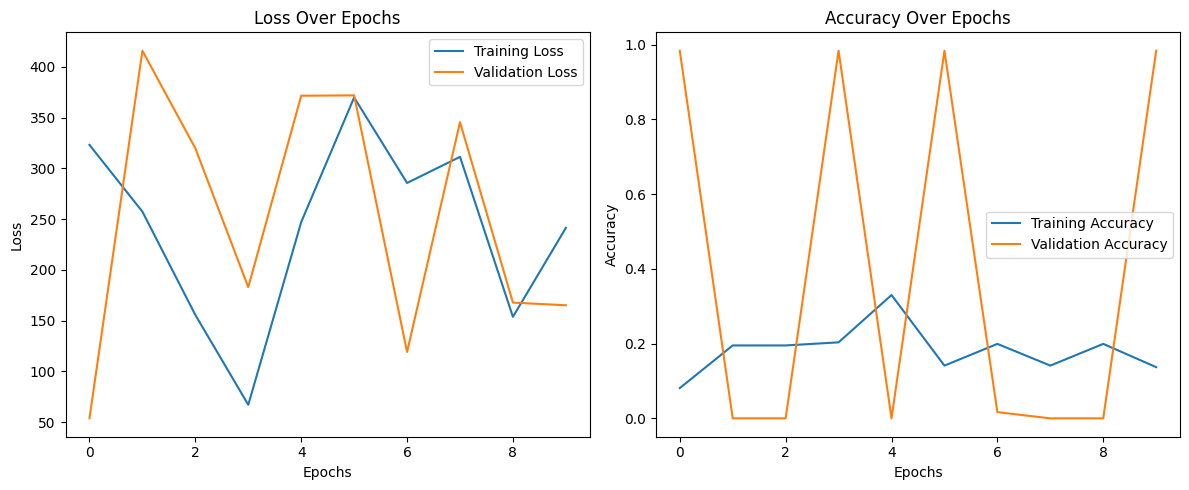

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Train the model and store the history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)  # Assuming you're using 20% of the data for validation

# Plotting Loss and Accuracy
plt.figure(figsize=(12, 5))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


<h3>Analysis of Findings</h3>

<ol>
<li>Micah Potter - Point Guard:</li>
Unjustified Choice: Potter's natural position is closer to the basket due to his size and post skills. While he might have some ball-handling skills, he lacks the agility and speed typically associated with point guards. Point guards are primary ball handlers and playmakers, and Potter doesn't fit this mold.
<li>Ahmad Caver - Shooting Guard:</li>
Justified Choice: Caver's scoring ability makes him a good fit for the shooting guard position. Shooting guards are primary scorers, and Caver's skill set aligns with this role.
<li>Ayo Dosunmu - Small Forward:</li>
Justified Choice: Dosunmu's versatility allows him to play as a small forward. He can score, rebound, and assist, which are key attributes for a small forward. However, he might be more naturally suited as a shooting guard.
<li>Amir Coffey - Power Forward:</li>
Somewhat Justified: While Coffey has the versatility to play multiple positions, the power forward spot might not be his natural position. Power forwards are typically stronger and play closer to the basket. Coffey might be better suited as a small forward, but with the right matchups, he could play as a stretch power forward.
<li>Alize Johnson - Center:</li>
Somewhat Justified: Johnson has the rebounding skills typical of a center, but he might lack the height and size to guard other centers in the league. He's more naturally a power forward but could play as a small-ball center in specific lineups.
</ol>

Some of these choices work, however, not all of them are the most optimal. Certain physical attributes and skills are required for certain positions despite NBA being a more fluid and dynamic system of players.

<h3>References</h3>

https://www.basketball-reference.com/